# Overview

Escherichia Coli (E. Coli) is a bacterium found in the intestines of many organisms, including humans. Some strains of it are harmful to humans, and are a major cause of food poisoning. More saliently for New Zealand rivers, it is present in many farm animals, and can be expelled in faecal matter, whereupon it grows aerobically for some time before dying off. This lifetime seems to be between 1 and 3 days depending on conditions. 

The health implications of the presence of E. Coli in water are large, either directly, or as an indicator for the presence of other harmful organisms. In August 2017, the New Zealand Government approved amendments to the National Policy Statement for Freshwater Management, the so-called ‘Clean Water’ package. 

The swimmability criteria place rivers into 5 categories (A–E, also called Blue, Green, Yellow, Orange, and Red, of which the first three are deemed ‘swimmable’), based on the frequency of meeting each of four E. coli thresholds:

|Category |Samples over 540 | Median | 95th Percentile | Samples over 260 |
-----|-----|------|-----|------|
| Blue (A) | < 5% | $\leq$130 | $\leq$540 | <20% |
| Green (B)| 5-10% | $\leq$130 | $\leq$1000 | 20-30% |
| Yellow (C) | 10-20% | $\leq$130 | $\leq$1200 | 20-34% |
| Orange (D) | 20-30% | >130 | >1200 | >34% |
| Red (E) | >30% | >130 | <1200 | >50% |


### Loading in the necessary libraries and dataset/s

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

In [4]:
df = pd.read_csv('../Datasets/EColiHorizons.csv',parse_dates=['Date'],dayfirst='T') 
df.head()

,Location,Test,Date,Count,Land height,Land type
0,Arawhata Drain at Hokio Beach Road,ECOLI,2006-02-01 09:45:00,430.0,Lowland,Rural
1,Arawhata Drain at Hokio Beach Road,ECOLI,2006-03-01 10:10:00,350.0,Lowland,Rural
2,Arawhata Drain at Hokio Beach Road,ECOLI,2006-03-22 11:05:00,410.0,Lowland,Rural
3,Arawhata Drain at Hokio Beach Road,ECOLI,2006-05-24 10:45:00,230.0,Lowland,Rural
4,Arawhata Drain at Hokio Beach Road,ECOLI,2006-06-27 11:20:00,65.0,Lowland,Rural


### Plotting the log(EColi count) over time for the Arawhata Drain at Hokio Beach Road and Manawatu at u/s PNCC STP.

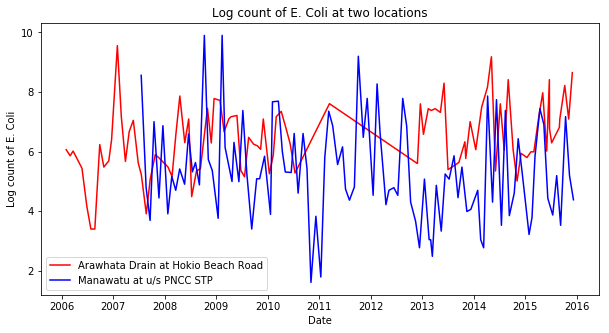

In [5]:
# Find the series
df1 = df[df.Location=='Arawhata Drain at Hokio Beach Road']
df2 = df[df.Location=='Manawatu at u/s PNCC STP']

# Plot the series
pl.figure(figsize=(10,5)) # Make the plot a bit bigger
pl.plot(df1.Date, np.log(df1.Count), 'r')
pl.plot(df2.Date, np.log(df2.Count),'b')

# Fill in the legends, titles, etc...
pl.legend(['Arawhata Drain at Hokio Beach Road','Manawatu at u/s PNCC STP'])
pl.xlabel('Date')
pl.ylabel('Log count of E. Coli')
pl.title('Log count of E. Coli at two locations')
pl.show()

### Exploring the data.


Possible things to identify:
- how many sites there are
- how often they were sampled
- what the range of observations is between the sites
- how many different types of site there are by land properties




How many sites there are:

In [5]:
len(np.unique(df.Location))

85

The number of samples per site are:

In [6]:
sam_count = df.groupby('Location')['Location'].count()
sam_count.head(10)

Location
Arawhata Drain at Hokio Beach Road      92
Hautapu at Alabasters                  114
Hautapu at US Rangitikei River Conf    120
Hokio at Lake Horowhenua                64
Kahuterawa at Johnstons Rata            90
Kumeti at Te Rehunga                    84
Makakahi at Hamua                      120
Makakahi at u/s Eketahuna STP          103
Makotuku at Above Sewage Plant          76
Makotuku at Raetihi                    109
Name: Location, dtype: int64

The range of observations between the sites are:

In [7]:
sam_count.max()-sam_count.min()

69

Alternatively we can use describe() to obtain summary statistics about the number of samples per site

In [8]:
sam_count.describe()

count     85.000000
mean     101.129412
std       15.501757
min       59.000000
25%       90.000000
50%      102.000000
75%      114.000000
max      128.000000
Name: Location, dtype: float64

The number of sites across different land properties are:

In [9]:
df.groupby(['Land height','Land type'])['Location'].count()

Land height  Land type
Lowland      Forest        632
             Rural        4728
Upland       Forest       1249
             Rural        1987
Name: Location, dtype: int64

### Linear fit graph
From the two sites identfied above, I tried to compute a linear fit to the log count of the data. Furthermore, I plotted a trend line over the data using np.polyfit to compute the line.

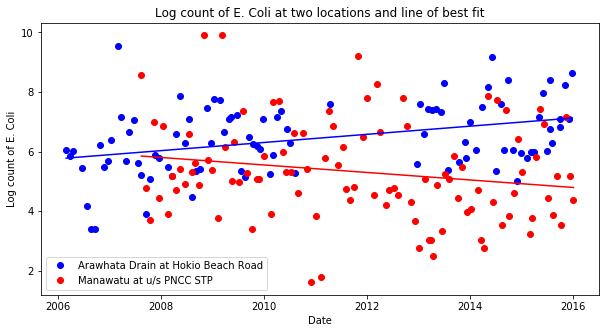

In [18]:
#dates
date1 = df1.Date.dt.day+30*df1.Date.dt.month+365*df1.Date.dt.year
date2 = df2.Date.dt.day+30*df2.Date.dt.month+365*df2.Date.dt.yearfit1 = np.polyfit(date1, np.log(df1.Count),1)

l1 = date1*fit1[0]+fit1[1]
fit2 = np.polyfit(date2, np.log(df2.Count),1)
l2 = date2*fit2[0]+fit2[1]

pl.figure(figsize=(10,5)) # Make the plot a bit bigger
pl.plot(date1/365,np.log(df1.Count),'bo')
pl.plot(date2/365,np.log(df2.Count),'ro')
pl.plot(date1/365,l1,'b')
pl.plot(date2/365,l2,'r')

pl.xlabel('Date')
pl.ylabel('Log count of E. Coli')
pl.title('Log count of E. Coli at two locations and line of best fit')

pl.legend(['Arawhata Drain at Hokio Beach Road','Manawatu at u/s PNCC STP'])
pl.show()

In [19]:
# simpler way to get dates
import datetime as dt

# Convert date from string format to numeric. 
date1 = pd.to_datetime(df1.Date)
date1 = date1.map(dt.datetime.toordinal)/365.2422+1 # Since a year has approximately 365.2422 days, and dt.datetime.toordinal counts from year 1 instead of year 0
date2 = pd.to_datetime(df2.Date)
date2 = date2.map(dt.datetime.toordinal)/365.2422+1

The log of E. Coli count at Arawhata Drain at Hokio Beach Road seems to be in an upward trend, whereas the equivalent figures at Manawatu at u/s PNCC STP seems to have a downward trend.